<h3>07.다층 퍼셉트론으로 손글씨 분류하기</h3>

<h4>1.숫자 필기 데이터 소개</h4>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드


In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


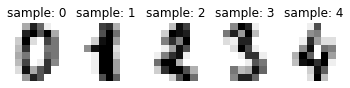

In [4]:
#상위 다섯개의 샘플만 시각화
images_and_labels = list(zip(digits.images,digits.target))

for index,(image,label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('sample: %i' % label)

In [5]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])
    

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


이제 훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다. 더 나은 방법은 digts.data를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [6]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
X = digits.data #이미지. 즉, 특성행렬
Y = digits.target # 각 이미지에 대한 레이블

<h4>2.다층 퍼셉츠론 분류기 만들기</h4>

In [14]:
import torch
import torch.nn as nn
from torch import optim

In [11]:
model = nn.Sequential(nn.Linear(64,32)\
    ,nn.ReLU(),\
    nn.Linear(32,16),\
    nn.ReLU(),\
    nn.Linear(16,10))

In [12]:
X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.int64)

/var/folders/5_/mwbjsnks32n7wtbr152n4mvh0000gn/T/ipykernel_4227/4158628878.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X,dtype=torch.float32)
/var/folders/5_/mwbjsnks32n7wtbr152n4mvh0000gn/T/ipykernel_4227/4158628878.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y,dtype=torch.int64)


In [13]:
loss_fn = nn.CrossEntropyLoss()

In [15]:
optimizer = optim.Adam(model.parameters())

In [16]:
losses=[]

In [17]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred,Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

    losses.append(loss.item())



Epoch    0/100 Cost: 2.917943
Epoch   10/100 Cost: 2.253029
Epoch   20/100 Cost: 2.124657
Epoch   30/100 Cost: 1.919545
Epoch   40/100 Cost: 1.673065
Epoch   50/100 Cost: 1.397705
Epoch   60/100 Cost: 1.139206
Epoch   70/100 Cost: 0.897105
Epoch   80/100 Cost: 0.689607
Epoch   90/100 Cost: 0.530571


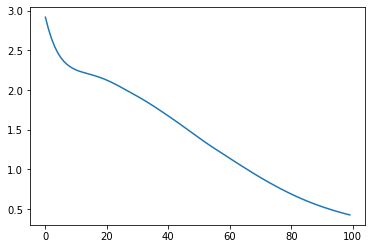

In [18]:
plt.plot(losses)